
📊 Feature: pH
✅ RMSE: 0.170
✅ R² Score: 0.918
✅ Accuracy Estimate: 91.82%


C:\Users\ayoub\AppData\Local\Temp\ipykernel_27104\597991723.py:87: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ayoub\miniconda3\envs\aqua-ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


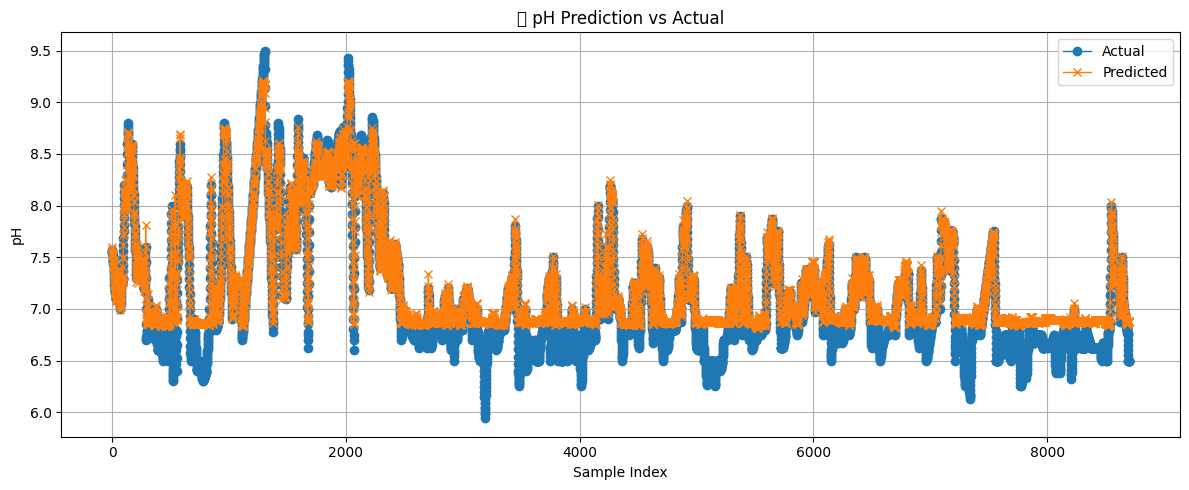

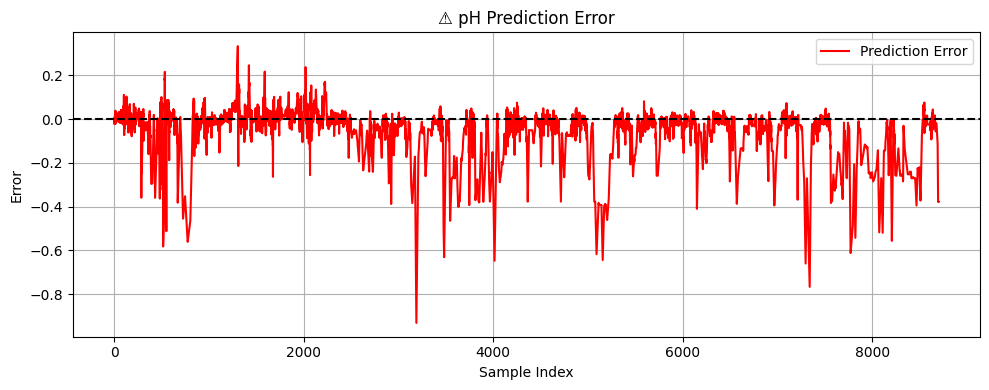

['input_features.pkl']

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import joblib

# 2. Load Data
df = pd.read_csv("waterquality.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# 3. Resample Daily and Interpolate
df = df.resample("D").mean()
df = df.interpolate(method="linear")
df.dropna(inplace=True)

# 4. Time Features
df["Month"] = df.index.month
df["DayOfYear"] = df.index.dayofyear
df["Week"] = df.index.isocalendar().week.astype(int)

# 5. Add Lag Features for all numerical columns except Month
non_time_cols = df.columns[df.columns != 'Month']
for col in non_time_cols:
    df[f"{col}_lag1"] = df[col].shift(1)
    df[f"{col}_lag2"] = df[col].shift(2)

# 6. Drop NaNs after lagging
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 7. Define Targets
target_cols = ["pH", "Turbidity", "Conductivity", "DissolvedOxygen", "BOD", "Nitrate", "TotalColiform"]
available_targets = [col for col in target_cols if col in df.columns]

# 8. Split Features and Targets
X = df.drop(columns=available_targets)
y = df[available_targets]

X = X.iloc[:-1]
y = y.iloc[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, shuffle=False
)

# 10. Scale Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 11. Train and Predict for Each Target
predictions = {}
scores = {}
models = {}

for col in y.columns:
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train_scaled, y_train[col])
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred))
    r2 = r2_score(y_test[col], y_pred)
    accuracy = r2 * 100

    predictions[col] = y_pred
    scores[col] = {"RMSE": rmse, "R2": r2, "Accuracy": accuracy}
    models[col] = model  # Store each model if needed

    print(f"\n📊 Feature: {col}")
    print(f"✅ RMSE: {rmse:.3f}")
    print(f"✅ R² Score: {r2:.3f}")
    print(f"✅ Accuracy Estimate: {accuracy:.2f}%")

    # Plot Actual vs Predicted
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(y_test[col])), y_test[col].values, label="Actual", marker='o', linewidth=1)
    plt.plot(range(len(y_pred)), y_pred, label="Predicted", marker='x', linewidth=1)
    plt.title(f"📈 {col} Prediction vs Actual")
    plt.xlabel("Sample Index")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Error
    error = y_test[col].values - y_pred
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(error)), error, color='red', label="Prediction Error")
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f"⚠️ {col} Prediction Error")
    plt.xlabel("Sample Index")
    plt.ylabel("Error")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 12. Save model and scaler for API
joblib.dump(models, "water_model.pkl")  # dict of models per target
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "input_features.pkl")




📊 Feature: pH
✅ RMSE: 0.170
✅ R² Score: 0.918
✅ Accuracy Estimate: 91.81%


C:\Users\ayoub\AppData\Local\Temp\ipykernel_27104\2606695889.py:78: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ayoub\miniconda3\envs\aqua-ai\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


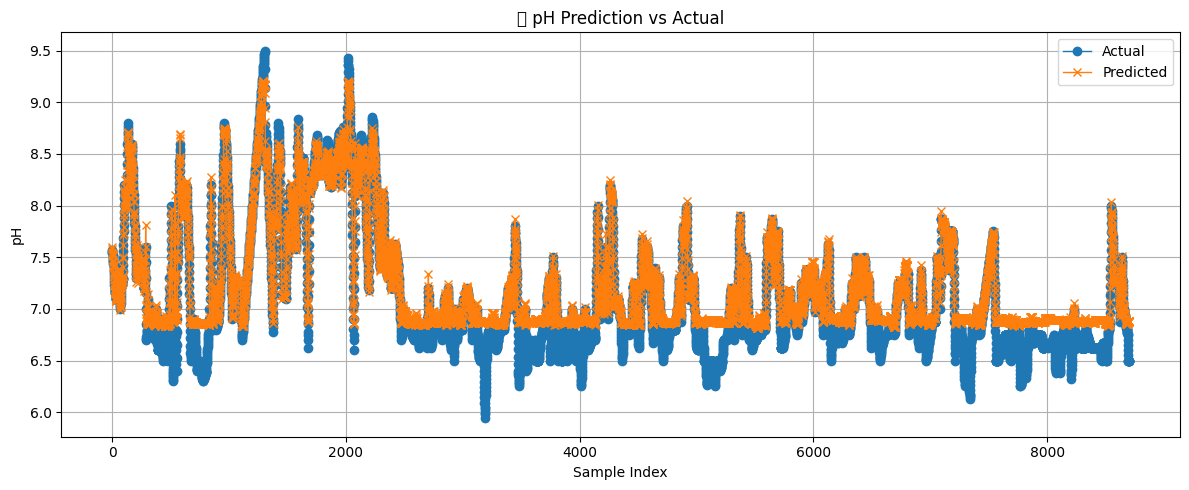

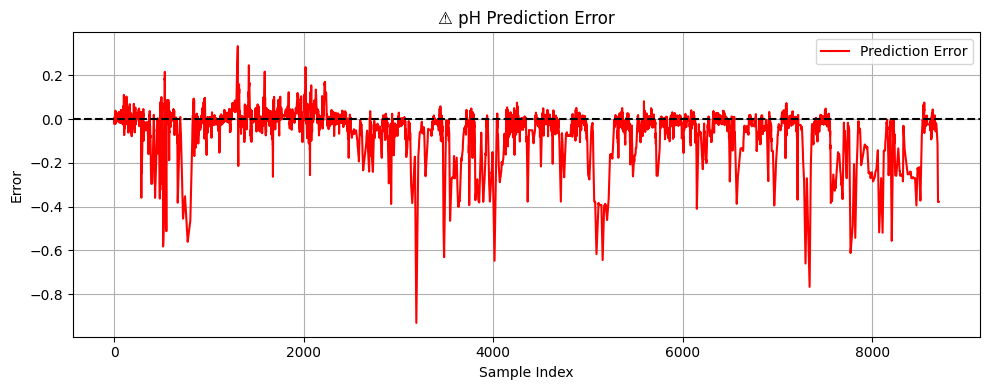

In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 2. Load Data
df = pd.read_csv("waterquality.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# 3. Resample Daily and Interpolate
df = df.resample("D").mean()
df = df.interpolate(method="linear")
df.dropna(inplace=True)

# 4. Time Features
df["Month"] = df.index.month
df["DayOfYear"] = df.index.dayofyear
df["Week"] = df.index.isocalendar().week.astype(int)

# 5. Add Lag Features for all parameters
lag_features = df.columns[df.columns != 'Month']
for col in lag_features:
    df[f"{col}_lag1"] = df[col].shift(1)
    df[f"{col}_lag2"] = df[col].shift(2)

# 6. Drop NaNs after lagging
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 7. Define Features and Targets
target_cols = ["pH", "Turbidity", "Conductivity", "DissolvedOxygen", "BOD", "Nitrate", "TotalColiform"]
available_targets = [col for col in target_cols if col in df.columns]
X = df.drop(columns=available_targets)
y = df[available_targets]

# 8. Train/Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=False)

# 9. Scale Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Train and Predict for Each Target
predictions = {}
scores = {}

for col in y.columns:
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train_scaled, y_train[col])
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred))
    r2 = r2_score(y_test[col], y_pred)
    accuracy = r2 * 100

    predictions[col] = y_pred
    scores[col] = {"RMSE": rmse, "R2": r2, "Accuracy": accuracy}

    print(f"\n📊 Feature: {col}")
    print(f"✅ RMSE: {rmse:.3f}")
    print(f"✅ R² Score: {r2:.3f}")
    print(f"✅ Accuracy Estimate: {accuracy:.2f}%")

    # Plot Actual vs Predicted
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(y_test[col])), y_test[col].values, label="Actual", marker='o', linewidth=1)
    plt.plot(range(len(y_pred)), y_pred, label="Predicted", marker='x', linewidth=1)
    plt.title(f"📈 {col} Prediction vs Actual")
    plt.xlabel("Sample Index")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Error
    error = y_test[col].values - y_pred
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(error)), error, color='red', label="Prediction Error")
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f"⚠️ {col} Prediction Error")
    plt.xlabel("Sample Index")
    plt.ylabel("Error")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 2. Load Data
df = pd.read_csv("waterquality.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# 3. Resample Daily and Interpolate
df = df.resample("D").mean()
df = df.interpolate(method="linear")
df.dropna(inplace=True)

# 4. Time Features
df["Month"] = df.index.month
df["DayOfYear"] = df.index.dayofyear
df["Week"] = df.index.isocalendar().week.astype(int)

# 5. Add Lag Features for all parameters
lag_features = df.columns[df.columns != 'Month']
for col in lag_features:
    df[f"{col}_lag1"] = df[col].shift(1)
    df[f"{col}_lag2"] = df[col].shift(2)

# 6. Drop NaNs after lagging
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 7. Define Features and Targets
target_cols = ["pH", "Turbidity", "Conductivity", "DissolvedOxygen", "BOD", "Nitrate", "TotalColiform"]
available_targets = [col for col in target_cols if col in df.columns]
X = df.drop(columns=available_targets)
y = df[available_targets]

# 8. Train/Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=False)

# 9. Scale Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Train and Predict for Each Target
predictions = {}
scores = {}

for col in y.columns:
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train_scaled, y_train[col])
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred))
    r2 = r2_score(y_test[col], y_pred)
    accuracy = r2 * 100

    predictions[col] = y_pred
    scores[col] = {"RMSE": rmse, "R2": r2, "Accuracy": accuracy}

    print(f"\n📊 Feature: {col}")
    print(f"✅ RMSE: {rmse:.3f}")
    print(f"✅ R² Score: {r2:.3f}")
    print(f"✅ Accuracy Estimate: {accuracy:.2f}%")

    # Plot Actual vs Predicted
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(y_test[col])), y_test[col].values, label="Actual", marker='o', linewidth=1)
    plt.plot(range(len(y_pred)), y_pred, label="Predicted", marker='x', linewidth=1)
    plt.title(f"📈 {col} Prediction vs Actual")
    plt.xlabel("Sample Index")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Error
    error = y_test[col].values - y_pred
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(error)), error, color='red', label="Prediction Error")
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f"⚠️ {col} Prediction Error")
    plt.xlabel("Sample Index")
    plt.ylabel("Error")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 2. Load Data
df = pd.read_csv("waterquality.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# 3. Resample Daily and Interpolate
df = df.resample("D").mean()
df = df.interpolate(method="linear")
df.dropna(inplace=True)

# 4. Time Features
df["Month"] = df.index.month
df["DayOfYear"] = df.index.dayofyear
df["Week"] = df.index.isocalendar().week.astype(int)

# 5. Add Lag Features for all parameters
lag_features = df.columns[df.columns != 'Month']
for col in lag_features:
    df[f"{col}_lag1"] = df[col].shift(1)
    df[f"{col}_lag2"] = df[col].shift(2)

# 6. Drop NaNs after lagging
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# 7. Define Features and Targets
target_cols = ["pH", "Turbidity", "Conductivity", "DissolvedOxygen", "BOD", "Nitrate", "TotalColiform"]
available_targets = [col for col in target_cols if col in df.columns]
X = df.drop(columns=available_targets)
y = df[available_targets]

# 8. Train/Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=False)

# 9. Scale Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Train and Predict for Each Target
predictions = {}
scores = {}

for col in y.columns:
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train_scaled, y_train[col])
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred))
    r2 = r2_score(y_test[col], y_pred)
    accuracy = r2 * 100

    predictions[col] = y_pred
    scores[col] = {"RMSE": rmse, "R2": r2, "Accuracy": accuracy}

    print(f"\n📊 Feature: {col}")
    print(f"✅ RMSE: {rmse:.3f}")
    print(f"✅ R² Score: {r2:.3f}")
    print(f"✅ Accuracy Estimate: {accuracy:.2f}%")

    # Plot Actual vs Predicted
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(y_test[col])), y_test[col].values, label="Actual", marker='o', linewidth=1)
    plt.plot(range(len(y_pred)), y_pred, label="Predicted", marker='x', linewidth=1)
    plt.title(f"📈 {col} Prediction vs Actual")
    plt.xlabel("Sample Index")
    plt.ylabel(col)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Error
    error = y_test[col].values - y_pred
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(error)), error, color='red', label="Prediction Error")
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f"⚠️ {col} Prediction Error")
    plt.xlabel("Sample Index")
    plt.ylabel("Error")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
